In [58]:
using Yao
using Yao.Blocks

using BenchmarkTools

In [2]:
entangler(nbit::Int, offset::Int) = chain(nbit, control(nbit, i+offset, mod(i+offset, nbit)+1=>X) for i=1:2:nbit)

entangler (generic function with 1 method)

In [126]:
function build_block(nbit::Int, theta::Real, trafie::Real)
    # entanglers
    entangler_A = entangler(nbit, 0)# |> cache
    entangler_B = entangler(nbit, 1)# |> cache
    entangler_AB = chain(entangler_A, entangler_B)# |> cache
    
    # rotations
    rz = Rz(theta)
    rx = Rx(trafie)
    rz_A = repeat(nbit, rz, 1:2:nbit)
    rz_B = repeat(nbit, rz, 2:2:nbit)
    rx_AB = repeat(nbit, rx, 1:nbit)
    
    chain(nbit, [entangler_A, rz_B, entangler_AB, rz_A, entangler_B, rx_AB])
    #chain(nbit, [entangler_A, entangler_AB, entangler_B])
    #chain(nbit, [rz_B,entangler_AB, rz_A, rx_AB])
end

build_block (generic function with 2 methods)

In [127]:
"""
Run dymamical quantum phase transition program.

    * g: the factor before σx term.
    * tmax: maximum time.
    * nslice: number of slices that Trotter decoposition.
"""
function dynamical_qft(nbit::Int, g::Real, tmax::Real, nslice::Int)
    dt = tmax/nslice
    trafie = dt*g
    theta = -dt
    unit = build_block(nbit, theta, trafie)
    
    reg = zero_state(nbit)
    res = Float64[]
    for i in 1:nslice
        apply!(reg, unit)
        push!(res, expect(put(nbit, nbit÷2=>Z), reg))
    end
    res
end

dynamical_qft

In [128]:
nslice = 500
tmax = 10
res = dynamical_qft(10, 2.0, 10, 500);

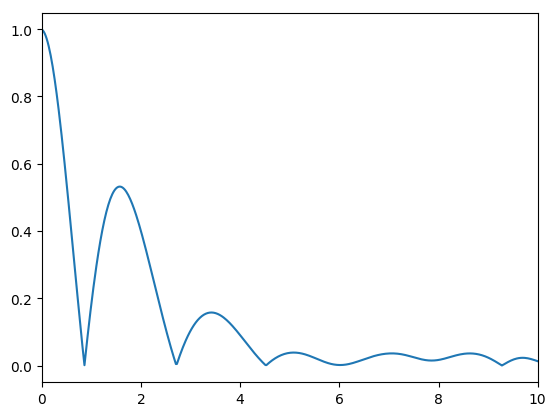

(0, 10)

In [129]:
using PyPlot
plot(LinRange(0, tmax, nslice), res .|> abs)
xlim(0,10)
#ylim(0,1)

In [98]:
@benchmark dynamical_qft(10, 2.0, 10, 500)

BenchmarkTools.Trial: 
  memory estimate:  5.40 MiB
  allocs estimate:  83965
  --------------
  minimum time:     27.505 ms (0.00% GC)
  median time:      27.721 ms (0.00% GC)
  mean time:        29.016 ms (3.36% GC)
  maximum time:     39.587 ms (12.20% GC)
  --------------
  samples:          173
  evals/sample:     1

In [84]:
@benchmark dynamical_qft(18, 2.0, 10, 500)

BenchmarkTools.Trial: 
  memory estimate:  8.03 GiB
  allocs estimate:  104843
  --------------
  minimum time:     12.538 s (3.26% GC)
  median time:      12.538 s (3.26% GC)
  mean time:        12.538 s (3.26% GC)
  maximum time:     12.538 s (3.26% GC)
  --------------
  samples:          1
  evals/sample:     1

In [112]:
XGate{Float64}()

X gate